# Matrice de distances


In [9]:
### Objectif calculer la matrice des distances

%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np
import cv2


import FeaturesExtractor.main as fe
from FeatureMatching.distance import getDistance,getFilteredMatch
from ImageProcessing.processing import cropToCoin


plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120

param = {"chemin":"data/19_Droit.jpg",
         "longeur caractéristique du RBF":7,
         "nombre de points d'interêts":100,
        }



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os

listeChemin = []

basepath = 'data/'
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        listeChemin.append(basepath + entry)
        
listeChemins = listeChemin[:]

In [11]:
len(listeChemins)

14

In [12]:
listeChemins[7]

'data/34268 Droit.jpg'

In [13]:
n = len(listeChemins)
N = np.empty((n,n))
N.fill(np.nan)

P = np.empty((n,n))
P.fill(np.nan)


In [14]:
for i in range(n):
    print(i,"/",n)
    for j in range(i):
        ###image 1
        param["chemin"] = listeChemins[i]
        [img1,feature1] = fe.getFeatures(param)
        ### Image 2
        param["chemin"] = listeChemins[j]
        [img2,feature2] = fe.getFeatures(param)
        
        kp1,kp2,match = getFilteredMatch(img1,feature1,img2,feature2)
        [nb,p] = getDistance(kp1,kp2,match)
        
        N[i,j] = nb
        P[i,j] = np.log(p)
        
        

        

        

0 / 14
1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
K : occurence trouvée dans la base de donnée
13 / 14
K : occurence trouvée dans la base de donnée


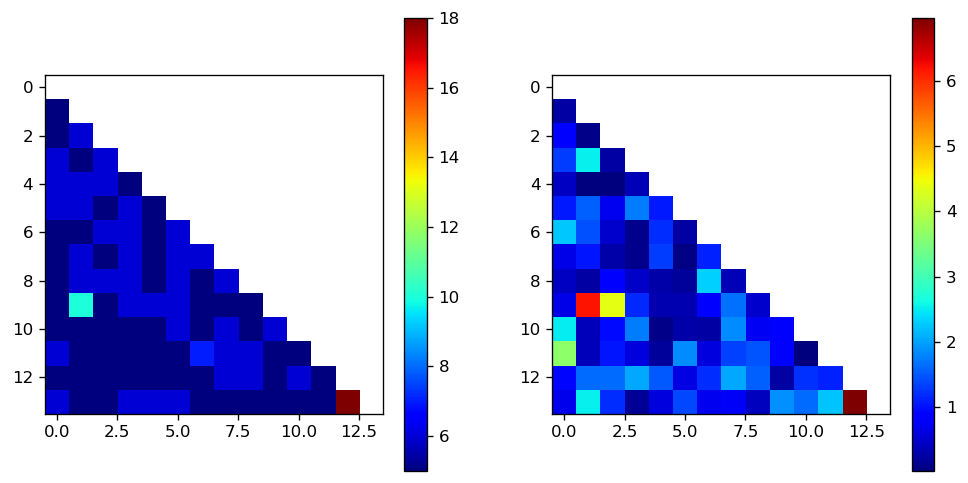

In [28]:
plt.subplot(1,2,1)
plt.imshow(N,cmap='jet')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(-P,cmap ='jet')
plt.colorbar()



In [25]:
print(listeChemins[9])
print(listeChemins[1])

data/39630 Droit.jpg
data/13001 Droit.jpg


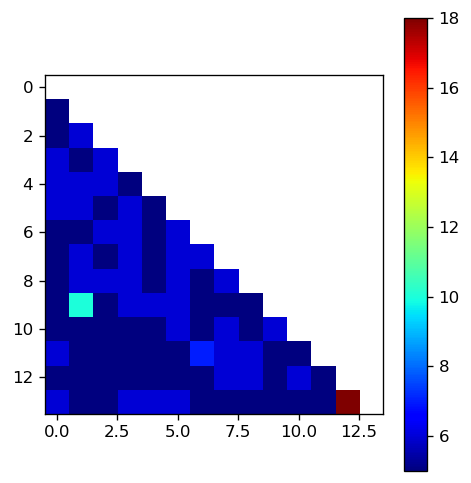

In [27]:
plt.subplot(1,2,1)
plt.imshow(N,cmap='jet')
plt.colorbar()

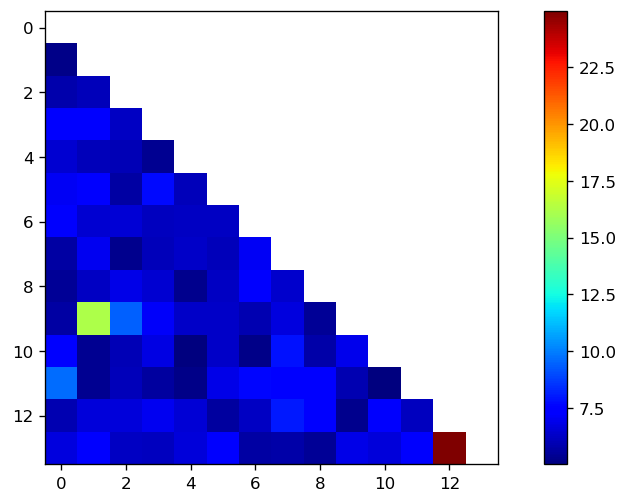

In [29]:
M = N-P
plt.imshow(M,cmap ='jet')
plt.colorbar()

In [17]:
idx = np.nanargmin(M)
shape = np.shape(M)


In [18]:
np.unravel_index(idx,shape)

(13, 12)

In [19]:
M[9,2]

-9.38584827890811

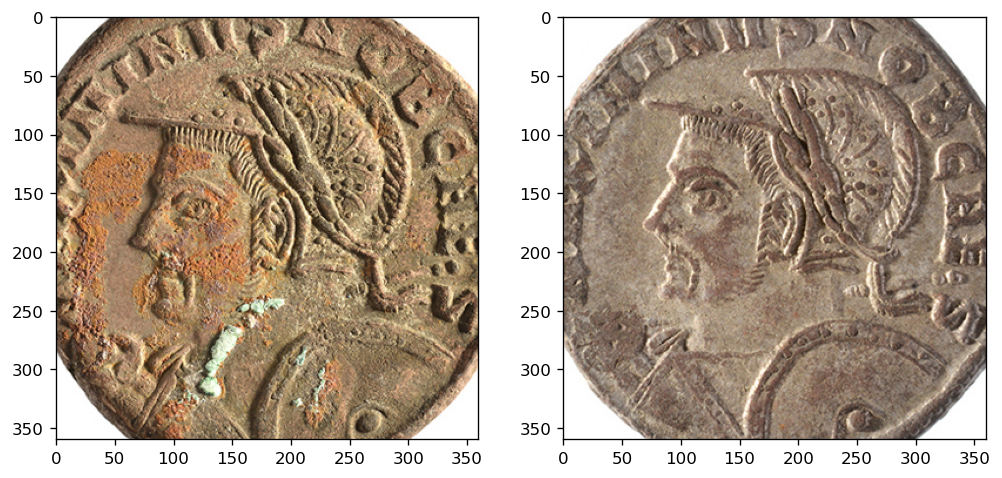

In [20]:
img1 = cropToCoin(listeChemins[6])
img2 = cropToCoin(listeChemins[7])

plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)



In [22]:
M[1,9]

NameError: name 'M' is not defined